# Bitcoin Price Prediction using Facebook **Prophet**

Shay Hegarty - L00119781
Placement Project




# **Importing Libraries**

In [1]:
#Importing pandas, fbprophet and plotly

import pandas as pd
from fbprophet import Prophet
import plotly.express as px 

In [2]:
#Initializing Plotly

import plotly.io as pio
pio.renderers.default = 'colab'

# **Importing the dataset and exploring the data**

In [3]:
from google.colab import files
files.upload()

Saving BTC-Prices.csv to BTC-Prices (4).csv


{'BTC-Prices.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2017-04-03,1102.949951,1151.739990,1102.949951,1143.810059,1143.810059,580444032\n2017-04-04,1145.520020,1156.439941,1120.520020,1133.250000,1133.250000,436310016\n2017-04-05,1134.140015,1135.089966,1113.630005,1124.780029,1124.780029,414784000\n2017-04-06,1125.810059,1188.369995,1125.810059,1182.680054,1182.680054,511222016\n2017-04-07,1178.939941,1186.579956,1163.390015,1176.900024,1176.900024,317022016\n2017-04-08,1172.650024,1184.979980,1162.579956,1175.949951,1175.949951,209312000\n2017-04-09,1176.569946,1197.209961,1171.859985,1187.869995,1187.869995,242343008\n2017-04-10,1187.300049,1190.339966,1179.040039,1187.130005,1187.130005,215883008\n2017-04-11,1187.459961,1208.069946,1187.459961,1205.010010,1205.010010,216182000\n2017-04-12,1204.810059,1207.140015,1196.760010,1200.369995,1200.369995,288702016\n2017-04-13,1201.020020,1205.890015,1156.439941,1169.280029,1169.280029,351968992\n2017-04-14,1170.329956,1190.800049

In [4]:
#Using the read_csv function in pandas to the read the data and assign it to the dataframe df

df = pd.read_csv("BTC-Prices.csv")

In [5]:
#Showing the data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-03,59397.410156,60110.269531,57603.890625,57603.890625,57603.890625,59641344484
1,2021-04-04,57604.839844,58913.746094,57168.675781,58758.554688,58758.554688,50749662970
2,2021-04-05,58760.875000,59891.296875,57694.824219,59057.878906,59057.878906,60706272115
3,2021-04-06,59171.933594,59479.578125,57646.808594,58192.359375,58192.359375,66058027988
4,2021-04-07,58186.507813,58731.144531,55604.023438,56048.937500,56048.937500,75645303584


In [6]:
#Showing the data
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962
362,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106
363,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287
364,2022-04-02,46285.500000,47028.281250,45782.511719,45868.949219,45868.949219,29336594194
365,2022-04-03,45860.222656,46630.562500,45636.675781,46333.406250,46333.406250,23230232576


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,46418.976867,47577.282323,45057.904206,46372.191278,46372.191278,3.690335e+10
std,9077.524121,9161.548951,8983.436356,9040.474219,9040.474219,1.549732e+10
min,29796.285156,31006.187500,28893.621094,29807.347656,29807.347656,1.373656e+10
25%,39111.136719,40091.232422,37812.997070,39113.262696,39113.262696,2.668698e+10
50%,45565.521485,46686.810547,44082.294922,45561.853515,45561.853515,3.347565e+10
75%,53734.291992,55383.115235,52076.940430,53566.101562,53566.101562,4.132266e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,1.263581e+11


# **Data Visualization**

In [9]:
# Area graph (Date Vs Price) to get an overview of the the price has been fluctuating

px.area(df, x='Date', y='Close')

In [10]:
# Violin plot to get a closer look at the statistics of the data

px.violin(df, y='Close')

# **Data Preperation before using Facebook Prophet**

In [11]:
#Creating a new dataframe and renaming the columns
#Renaming the columns is required for the fbprophet model 'ds' and 'y'

prophet_df = df.rename(columns={'Date':'ds', 'Close':'y'})

In [12]:
#Showing the data

prophet_df.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2021-04-03,59397.410156,60110.269531,57603.890625,57603.890625,57603.890625,59641344484
1,2021-04-04,57604.839844,58913.746094,57168.675781,58758.554688,58758.554688,50749662970
2,2021-04-05,58760.875000,59891.296875,57694.824219,59057.878906,59057.878906,60706272115
3,2021-04-06,59171.933594,59479.578125,57646.808594,58192.359375,58192.359375,66058027988
4,2021-04-07,58186.507813,58731.144531,55604.023438,56048.937500,56048.937500,75645303584


In [13]:
#Showing the data

prophet_df.tail()

,ds,Open,High,Low,y,Adj Close,Volume
361,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962
362,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106
363,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287
364,2022-04-02,46285.500000,47028.281250,45782.511719,45868.949219,45868.949219,29336594194
365,2022-04-03,45860.222656,46630.562500,45636.675781,46333.406250,46333.406250,23230232576


# **Modelling**

In [14]:
#Creating the object(model)

fbp = Prophet(daily_seasonality=True)

#Fit/Train the object(model)
fbp.fit(prophet_df)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


# **Forecasting**

In [16]:
future = fbp.make_future_dataframe(periods=30)
forecast = fbp.predict(future)

In [17]:
#Showing the data

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-04-03,58123.852436,56124.027323,66506.510883,58123.852436,58123.852436,3000.794597,3000.794597,3000.794597,3116.653972,3116.653972,3116.653972,-115.859375,-115.859375,-115.859375,0.0,0.0,0.0,61124.647033
1,2021-04-04,57774.243420,56266.005535,66042.786372,57774.243420,57774.243420,3156.575161,3156.575161,3156.575161,3116.653972,3116.653972,3116.653972,39.921189,39.921189,39.921189,0.0,0.0,0.0,60930.818581
2,2021-04-05,57424.634404,55625.737301,65983.055170,57424.634404,57424.634404,3162.586935,3162.586935,3162.586935,3116.653972,3116.653972,3116.653972,45.932963,45.932963,45.932963,0.0,0.0,0.0,60587.221339
3,2021-04-06,57075.025387,54669.619662,65268.541407,57075.025387,57075.025387,3167.256004,3167.256004,3167.256004,3116.653972,3116.653972,3116.653972,50.602032,50.602032,50.602032,0.0,0.0,0.0,60242.281392
4,2021-04-07,56725.416371,55021.104411,64641.831184,56725.416371,56725.416371,3275.038141,3275.038141,3275.038141,3116.653972,3116.653972,3116.653972,158.384169,158.384169,158.384169,0.0,0.0,0.0,60000.454511


In [18]:
#Showing the data

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
391,2022-04-29,37164.766424,34889.746614,45178.356182,35816.432484,38508.450744,3027.026370,3027.026370,3027.026370,3116.653972,3116.653972,3116.653972,-89.627602,-89.627602,-89.627602,0.0,0.0,0.0,40191.792793
392,2022-04-30,37144.605571,34760.626947,45267.470017,35687.612008,38601.617942,3000.794597,3000.794597,3000.794597,3116.653972,3116.653972,3116.653972,-115.859375,-115.859375,-115.859375,0.0,0.0,0.0,40145.400168
393,2022-05-01,37124.444719,34777.610065,45517.996950,35599.192692,38673.692979,3156.575161,3156.575161,3156.575161,3116.653972,3116.653972,3116.653972,39.921189,39.921189,39.921189,0.0,0.0,0.0,40281.019879
394,2022-05-02,37104.283866,34816.521182,45721.784188,35471.693060,38759.060167,3162.586935,3162.586935,3162.586935,3116.653972,3116.653972,3116.653972,45.932963,45.932963,45.932963,0.0,0.0,0.0,40266.870801
395,2022-05-03,37084.123013,35049.792040,45535.428676,35349.386964,38840.399226,3167.256004,3167.256004,3167.256004,3116.653972,3116.653972,3116.653972,50.602032,50.602032,50.602032,0.0,0.0,0.0,40251.379018


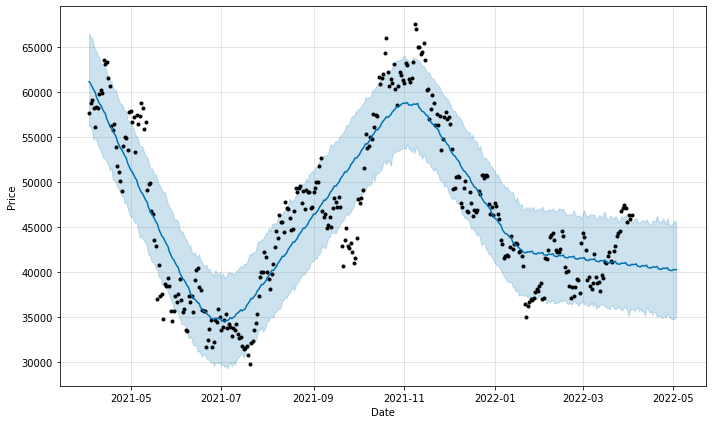

In [20]:
#Visualizing the data to see how accuarte the model is

figure = fbp.plot(forecast, xlabel='Date', ylabel='Price')

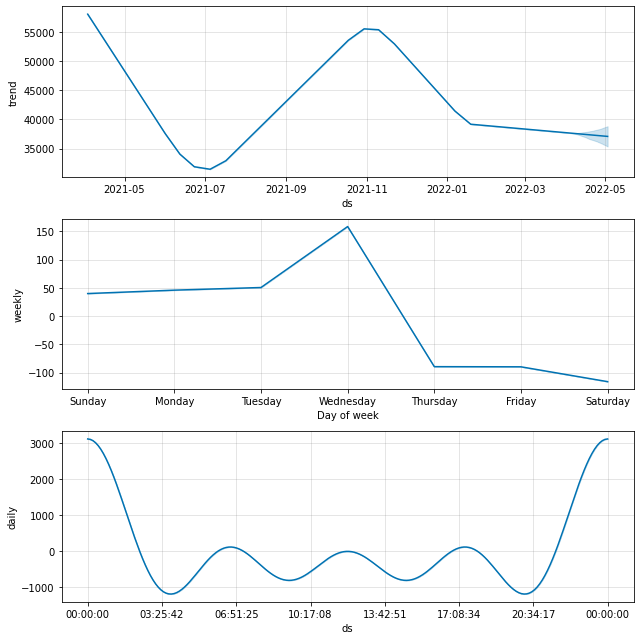

In [22]:
figure2=fbp.plot_components(forecast)

In [23]:
#forecast.to_csv("forecast.csv")
#from google.colab import files
#files.download('forecast.csv')